In [90]:
#Importing Libraries
import pandas as pd                  #essential for data reading,writing etc
import matplotlib.pyplot as plt       #for plotting graph
import numpy as np                   #for algebric calculations
import seaborn as sns                #visualization library
import plotly.express as px          #ploting parameter's
import plotly.express
import neattext.functions as nfx     #for text cleaning  
import re
import sys                            #for System-specific parameters and functions.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7) #plotting parameters size's.
import warnings
warnings.filterwarnings('ignore')

In [91]:
#Loading Dataset
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',None)
df=pd.read_csv('naukri_data.csv')

In [92]:
#The total number of elements.
#This is equal to the row_count * column_coun.

print(df.shape[0] * df.shape[1])

286000


In [93]:
#overview of data
df.head()


,company,education,Job Experience Required,Industry,jobdescription,jobid,Location,Job Title,numberofpositions,Job Salary,Crawl Timestamp,Key Skills,Uniq Id
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,2.110000e+11,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,Business process outsourcing/Call Centre/Infor...,43b19632647068535437c774b6ca6cf8
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,2.110000e+11,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,Marketing,d4c72325e57f89f364812b5ed5a795f0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,1.010000e+11,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,8.101690e+10,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,Accounts,115d28f140f694dd1cc61c53d03c66ae
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,1.210000e+11,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4


In [94]:
df.dtypes

company                     object
education                   object
Job Experience Required     object
Industry                    object
jobdescription              object
jobid                      float64
Location                    object
Job Title                   object
numberofpositions          float64
Job Salary                  object
Crawl Timestamp             object
Key Skills                  object
Uniq Id                     object
dtype: object

In [95]:
##the timestamp is in a more understandable form and can be converted into
##the required timestamp data frame using pandas.to_datetime method
df['Crawl Timestamp']=pd.to_datetime(df['Crawl Timestamp'])

In [96]:
df.head()

,company,education,Job Experience Required,Industry,jobdescription,jobid,Location,Job Title,numberofpositions,Job Salary,Crawl Timestamp,Key Skills,Uniq Id
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,2.110000e+11,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00+00:00,Business process outsourcing/Call Centre/Infor...,43b19632647068535437c774b6ca6cf8
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,2.110000e+11,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00+00:00,Marketing,d4c72325e57f89f364812b5ed5a795f0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,1.010000e+11,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55+00:00,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,8.101690e+10,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55+00:00,Accounts,115d28f140f694dd1cc61c53d03c66ae
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,1.210000e+11,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55+00:00,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4


# Missing Values

In [97]:
df.isna().any()

company                     True
education                   True
Job Experience Required     True
Industry                    True
jobdescription              True
jobid                      False
Location                    True
Job Title                  False
numberofpositions           True
Job Salary                  True
Crawl Timestamp             True
Key Skills                  True
Uniq Id                    False
dtype: bool

In [98]:
cols=[ 'company', 'education',
       'Job Experience Required', 'Industry', 'jobdescription', 'Location',
       'Job Salary', 'Crawl Timestamp', 'Key Skills','numberofpositions']
empty_vals=[]
for col in cols:
    print('Number of missing values in {}: {}'.format(col,df[col].isna().value_counts()[1]))
    empty_vals.append(df[col].isna().value_counts()[1])
print('Total entries:{}'.format(len(df)))

Number of missing values in company: 4
Number of missing values in education: 1995
Number of missing values in Job Experience Required: 4
Number of missing values in Industry: 5
Number of missing values in jobdescription: 4
Number of missing values in Location: 501
Number of missing values in Job Salary: 97
Number of missing values in Crawl Timestamp: 23
Number of missing values in Key Skills: 528
Number of missing values in numberofpositions: 17536
Total entries:22000


In [99]:
missing_df=pd.DataFrame(columns=['Column','Missing values'])
missing_df['Column']=cols
missing_df['Missing values']=empty_vals
missing_df.sort_values(by='Missing values',inplace=True,ascending=False)
missing_df.index=missing_df.Column
missing_df.drop('Column',axis=1,inplace=True)
missing_df

,Missing values
Column,
numberofpositions,17536
education,1995
Key Skills,528
Location,501
Job Salary,97
Crawl Timestamp,23
Industry,5
company,4
Job Experience Required,4


In [100]:
del df['numberofpositions']

In [101]:
cols=[ 'company', 'education',
       'Job Experience Required', 'Industry', 'jobdescription', 'Location',
       'Job Salary', 'Crawl Timestamp', 'Key Skills']
empty_vals=[]
for col in cols:
    print('Number of missing values in {}: {}'.format(col,df[col].isna().value_counts()[1]))
    empty_vals.append(df[col].isna().value_counts()[1])
print('Total entries:{}'.format(len(df)))

Number of missing values in company: 4
Number of missing values in education: 1995
Number of missing values in Job Experience Required: 4
Number of missing values in Industry: 5
Number of missing values in jobdescription: 4
Number of missing values in Location: 501
Number of missing values in Job Salary: 97
Number of missing values in Crawl Timestamp: 23
Number of missing values in Key Skills: 528
Total entries:22000


In [102]:
missing_df=pd.DataFrame(columns=['Column','Missing values'])
missing_df['Column']=cols
missing_df['Missing values']=empty_vals
missing_df.sort_values(by='Missing values',inplace=True,ascending=False)
missing_df.index=missing_df.Column
missing_df.drop('Column',axis=1,inplace=True)
missing_df

,Missing values
Column,
education,1995
Key Skills,528
Location,501
Job Salary,97
Crawl Timestamp,23
Industry,5
company,4
Job Experience Required,4
jobdescription,4


In [103]:
df.head()

,company,education,Job Experience Required,Industry,jobdescription,jobid,Location,Job Title,Job Salary,Crawl Timestamp,Key Skills,Uniq Id
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,2.110000e+11,Chennai,Walkin Data Entry Operator (night Shift),"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00+00:00,Business process outsourcing/Call Centre/Infor...,43b19632647068535437c774b6ca6cf8
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,2.110000e+11,Chennai,Work Based Onhome Based Part Time.,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00+00:00,Marketing,d4c72325e57f89f364812b5ed5a795f0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,1.010000e+11,Bengaluru,Pl/sql Developer - SQL,Not Disclosed by Recruiter,2016-10-13 16:20:55+00:00,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,8.101690e+10,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,Not Disclosed by Recruiter,2016-10-13 16:20:55+00:00,Accounts,115d28f140f694dd1cc61c53d03c66ae
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,1.210000e+11,Bengaluru,JAVA Technical Lead (6-8 yrs) -,Not Disclosed by Recruiter,2016-10-13 16:20:55+00:00,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4


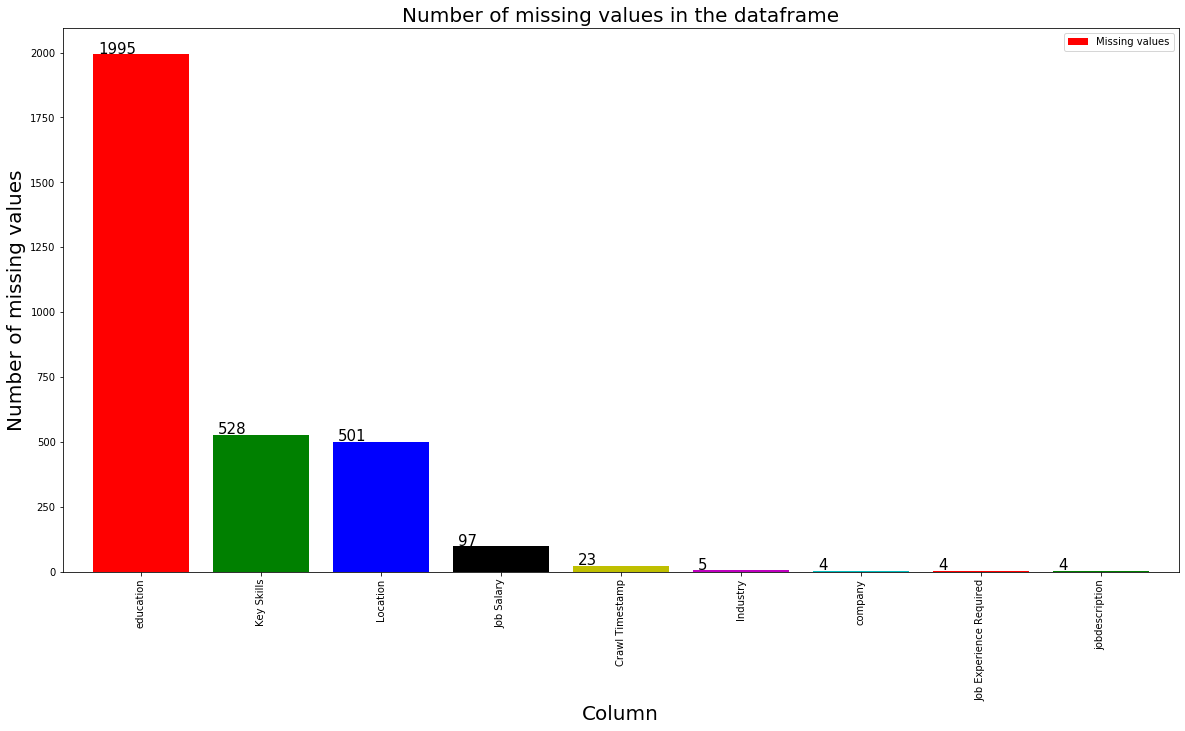

In [104]:
#Plot displays no of missing values in data
my_colors = 'rgbkymc'  #red, green, blue, black, etc.
ax=missing_df.plot(kind='bar',figsize=(20,10),rot=90,width=0.8,color=my_colors)
ax.set_title("Number of missing values in the dataframe",size=20)
ax.set_ylabel('Number of missing values',size=20)
ax.set_xlabel('Column',size=20)


#For annotating the bars

for i in ax.patches:
    ax.text(i.get_x()+0.045,i.get_height()+2,str(round((i.get_height()), 2)),
            rotation=0,fontsize=15,color='black')

In [105]:
df.dropna(axis=0,inplace=True)

In [106]:
df.isna().any()

company                    False
education                  False
Job Experience Required    False
Industry                   False
jobdescription             False
jobid                      False
Location                   False
Job Title                  False
Job Salary                 False
Crawl Timestamp            False
Key Skills                 False
Uniq Id                    False
dtype: bool

In [107]:
df.size

228432

# Job Title

In [108]:
df['Job Title'].describe()

count                              19036
unique                             15010
top       Business Development Executive
freq                                  87
Name: Job Title, dtype: object

In [109]:
df['Job Title'].value_counts()[0:10]

Business Development Executive    87
Business Development Manager      86
Software Engineer                 80
Project Manager                   64
Android Developer                 63
Web Designer                      59
Sales Executive                   55
Content Writer                    54
Senior Software Engineer          52
Java Developer                    51
Name: Job Title, dtype: int64

In [110]:
#cleaning the titles
import neattext.functions as nfx 

In [111]:
df['Job Title'] = df['Job Title'].apply(nfx.remove_emails)
df['Job Title'] = df['Job Title'].apply(nfx.remove_phone_numbers)
df['Job Title'] = df['Job Title'].str.replace('Whatsapp', '').str.replace('whatsapp', '').str.replace('India', '')
df['Job Title'] = df['Job Title'].str.replace('bangalore', '').str.replace('Delhi/NCR', '').str.replace('Hyderabad', '')
df['Job Title'] = df['Job Title'].str.replace('Bangalore', '')
df['Job Title'] = df['Job Title'].str.replace('Chennai', '')
df['Job Title'] = df['Job Title'].str.replace('Ahemdabaad', '')
df['Job Title'] = df['Job Title'].str.replace('Mumbai', '')
df['Job Title'] = df['Job Title'].str.replace('Pune', '')
df['Job Title'] = df['Job Title'].str.replace('Ã', '').str.replace('Â -Ã', '')

In [112]:
df_temp=df.copy()

In [113]:
df_temp.loc[df_temp['Job Title'].str.contains('Planner', case=False), 'Cleaned Title'] = 'Planner'
df_temp.loc[df_temp['Job Title'].str.contains('Analyst', case=False), 'Cleaned Title'] = 'Analyst'
df_temp.loc[df_temp['Job Title'].str.contains('Analytics', case=False), 'Cleaned Title'] = 'Analyst'
df_temp.loc[df_temp['Job Title'].str.contains('Develop',case=False),'Cleaned Title']='Software/Web/App Developer'
df_temp.loc[df_temp['Job Title'].str.contains('Software',case=False),'Cleaned Title']='Software/Web/App Developer'
df_temp.loc[df_temp['Job Title'].str.contains('Web',case=False),'Cleaned Title']='Software/Web/App Developer'
df_temp.loc[df_temp['Job Title'].str.contains('App',case=False),'Cleaned Title']='Software/Web/App Developer'
df_temp.loc[df_temp['Job Title'].str.contains('Designer', case=False), 'Cleaned Title'] = 'Design and Creativity'
df_temp.loc[df_temp['Job Title'].str.contains('Animation', case=False), 'Cleaned Title'] = 'Design and Creativity'
df_temp.loc[df_temp['Job Title'].str.contains('Content', case=False), 'Cleaned Title'] = 'Design and Creativity'
df_temp.loc[df_temp['Job Title'].str.contains('Consultant', case=False), 'Cleaned Title'] = 'Consultancy'
df_temp.loc[df_temp['Job Title'].str.contains('Risk', case=False), 'Cleaned Title'] = 'Risk analyst'
df_temp.loc[df_temp['Job Title'].str.contains('Call', case=False), 'Cleaned Title'] = 'Customer service'
df_temp.loc[df_temp['Job Title'].str.contains('Support',case=False),'Cleaned Title']='Customer service'
df_temp.loc[df_temp['Job Title'].str.contains('Customer support',case=False),'Cleaned Title']='Customer service'
df_temp.loc[df_temp['Job Title'].str.contains('Engineer',case=False),'Cleaned Title']='Core engineering'
df_temp.loc[df_temp['Job Title'].str.contains('Tech',case=False),'Cleaned Title']='Information Technonogy'
df_temp.loc[df_temp['Job Title'].str.contains('Prof',case=False),'Cleaned Title']='Academic role'
df_temp.loc[df_temp['Job Title'].str.contains('Business development',case=False),'Cleaned Title']='Business Developer/Intelligence'
df_temp.loc[df_temp['Job Title'].str.contains('Social Media',case=False),'Cleaned Title']='Public Relations'
df_temp.loc[df_temp['Job Title'].str.contains('HR',case=False),'Cleaned Title']='Human Resources'
df_temp.loc[df_temp['Job Title'].str.contains('HR Executive',case=False),'Cleaned Title']='Human Resources'
df_temp.loc[df_temp['Job Title'].str.contains('Manager',case=False),'Cleaned Title']='Managerial role'
df_temp.loc[df_temp['Job Title'].str.contains('Fresher',case=False),'Cleaned Title']='Fresher role'
df_temp.loc[df_temp['Job Title'].str.contains('Account',case=False),'Cleaned Title']='Accounting role'
df_temp.loc[df_temp['Job Title'].str.contains('Intern',case=False),'Cleaned Title']='Internships'
df_temp.loc[df_temp['Job Title'].str.contains('Placement',case=False),'Cleaned Title']='Placement & Liaison'
df_temp.loc[df_temp['Job Title'].str.contains('Liaison',case=False),'Cleaned Title']='Placement & Liaison'
df_temp.loc[df_temp['Job Title'].str.contains('Recruit',case=False),'Cleaned Title']='Placement & Liaison'
df_temp.loc[df_temp['Job Title'].str.contains('Data',case=False),'Cleaned Title']='Data Science'
df_temp.loc[df_temp['Job Title'].str.contains('Sale',case=False),'Cleaned Title']='Sales Executive'
df_temp.loc[df_temp['Job Title'].str.contains('Health',case=False),'Cleaned Title']='Health Care'
df_temp.loc[df_temp['Job Title'].str.contains('Quality',case=False),'Cleaned Title']='Quality Control'
df_temp.loc[df_temp['Job Title'].str.contains('Tele',case=False),'Cleaned Title']='Telemarketing'
df_temp.loc[df_temp['Job Title'].str.contains('Marketing',case=False),'Cleaned Title']='Marketing'
df_temp.loc[df_temp['Job Title'].str.contains('Sales',case=False),'Cleaned Title']='Sales'

In [114]:
df_temp['Cleaned Title'].value_counts()

Software/Web/App Developer         2584
Managerial role                    2162
Core engineering                   1941
Sales                              1581
Information Technonogy              729
Design and Creativity               604
Marketing                           482
Analyst                             472
Data Science                        422
Accounting role                     416
Consultancy                         392
Placement & Liaison                 325
Academic role                       300
Customer service                    300
Fresher role                        257
Quality Control                     249
Human Resources                     211
Business Developer/Intelligence     201
Internships                         180
Telemarketing                       119
Health Care                          52
Risk analyst                         34
Public Relations                     29
Sales Executive                      15
Planner                              12


In [115]:
df_temp['Cleaned Title'].isna().value_counts()

False    14069
True      4967
Name: Cleaned Title, dtype: int64

In [116]:
df_temp.dropna(inplace=True)

In [117]:
df_temp=df_temp[['company', 'education','Job Title','jobdescription', 'Cleaned Title','Job Salary', 'Job Experience Required',
       'Key Skills', 'Location',
       'Industry','Crawl Timestamp']]

In [118]:
df_temp.head()

,company,education,Job Title,jobdescription,Cleaned Title,Job Salary,Job Experience Required,Key Skills,Location,Industry,Crawl Timestamp
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,Walkin Data Entry Operator (night Shift),Job Description Send me Jobs like this Quali...,Data Science,"1,50,000 - 2,25,000 P.A",0 - 1 yrs,Business process outsourcing/Call Centre/Infor...,Chennai,Media / Entertainment / Internet,2016-05-21 19:30:00+00:00
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,Pl/sql Developer - SQL,Job Description Send me Jobs like this - as ...,Software/Web/App Developer,Not Disclosed by Recruiter,4 - 8 yrs,IT Software - Application Programming,Bengaluru,IT-Software / Software Services,2016-10-13 16:20:55+00:00
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,Manager/ad/partner - Indirect Tax - CA,Job Description Send me Jobs like this - Inv...,Managerial role,Not Disclosed by Recruiter,11 - 15 yrs,Accounts,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Banking / Financial Services / Broking,2016-10-13 16:20:55+00:00
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,JAVA Technical Lead (6-8 yrs) -,Job Description Send me Jobs like this Pleas...,Information Technonogy,Not Disclosed by Recruiter,6 - 8 yrs,IT Software - Application Programming,Bengaluru,IT-Software / Software Services,2016-10-13 16:20:55+00:00
5,PFS Web Global Services Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:MCA - ...,WALK IN - As400 Developer - Pfsweb Global Serv...,Job Description Send me Jobs like this We ar...,Software/Web/App Developer,Not Disclosed by Recruiter,2 - 5 yrs,IT Software - Application Programming,Bengaluru,IT-Software / Software Services,2016-10-13 16:20:55+00:00


In [164]:
df.head()

,company,education,Job Title,jobdescription,Cleaned Title,Job Salary,Job Experience Required,Key Skills,Location,Industry,Crawl Timestamp
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,Walkin Data Entry Operator (night Shift),Job Description Send me Jobs like this Quali...,Data Science,"1,50,000 - 2,25,000 P.A",0 - 1 yrs,Business process outsourcing/Call Centre/Infor...,CHENNAI,Media / Entertainment / Internet,2016-05-21 19:30:00+00:00
1,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,Pl/sql Developer - SQL,Job Description Send me Jobs like this - as ...,Software/Web/App Developer,Not Disclosed by Recruiter,4 - 8 yrs,IT Software - Application Programming,BENGALURU,IT-Software / Software Services,2016-10-13 16:20:55+00:00
2,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,Manager/ad/partner - Indirect Tax - CA,Job Description Send me Jobs like this - Inv...,Managerial role,Not Disclosed by Recruiter,11 - 15 yrs,Accounts,"MUMBAI, BENGALURU, KOLKATA, CHENNAI, COIMBATOR...",Banking / Financial Services / Broking,2016-10-13 16:20:55+00:00
3,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,JAVA Technical Lead (6-8 yrs) -,Job Description Send me Jobs like this Pleas...,Information Technonogy,Not Disclosed by Recruiter,6 - 8 yrs,IT Software - Application Programming,BENGALURU,IT-Software / Software Services,2016-10-13 16:20:55+00:00
4,PFS Web Global Services Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:MCA - ...,WALK IN - As400 Developer - Pfsweb Global Serv...,Job Description Send me Jobs like this We ar...,Software/Web/App Developer,Not Disclosed by Recruiter,2 - 5 yrs,IT Software - Application Programming,BENGALURU,IT-Software / Software Services,2016-10-13 16:20:55+00:00


# Job Experience

In [165]:
df.reset_index(inplace=True,drop=True)
df=df.copy() #Checkpoint

In [166]:
df['Job Experience Required'].value_counts()[0:10]

2 - 7 yrs     1161
2 - 5 yrs      857
3 - 8 yrs      808
5 - 10 yrs     721
3 - 5 yrs      668
2 - 4 yrs      508
1 - 3 yrs      474
3 - 6 yrs      426
4 - 9 yrs      424
1 - 6 yrs      365
Name: Job Experience Required, dtype: int64

In [168]:
#Since all the experiences are required in years, hence we can remove the years from the column
for i in range(len(df)):
    df_temp['Job Experience Required'][i]=df_temp['Job Experience Required'][i].replace('yrs','')
    df_temp['Job Experience Required'][i]=df_temp['Job Experience Required'][i].replace('years','')
    df_temp['Job Experience Required'][i]=df_temp['Job Experience Required'][i].replace('Years','')

    i+=1

In [169]:
df['Job Experience Required'].value_counts()[0:10]

2 - 7 yrs     1161
2 - 5 yrs      857
3 - 8 yrs      808
5 - 10 yrs     721
3 - 5 yrs      668
2 - 4 yrs      508
1 - 3 yrs      474
3 - 6 yrs      426
4 - 9 yrs      424
1 - 6 yrs      365
Name: Job Experience Required, dtype: int64

In [123]:
top_job_exp=df_temp['Job Experience Required'].value_counts()[0:10]
top_job_exp

2 - 7      1161
2 - 5       857
3 - 8       808
5 - 10      721
3 - 5       668
2 - 4       508
1 - 3       474
3 - 6       426
4 - 9       424
1 - 6       365
Name: Job Experience Required, dtype: int64

In [170]:
#To make the data more intuitive in nature, we shall label the job experiences as follows:
#0-1 : Freshers 1-5 : Early professionals 5-10 : Expereinced professionals
exp_df=pd.DataFrame(top_job_exp)
exp_df.reset_index(inplace=True)

In [171]:
exp_df.rename(columns={'index':'Job Experience','Job Experience Required':'Count'},inplace=True)

In [172]:
exp_df

,Job Experience,Count
0,2 - 7,1161
1,2 - 5,857
2,3 - 8,808
3,5 - 10,721
4,3 - 5,668
5,2 - 4,508
6,1 - 3,474
7,3 - 6,426
8,4 - 9,424
9,1 - 6,365


In [177]:
exp_df.loc[exp_df['Job Experience'].str.contains('0 - 5',case=False),'Sorted Experience']='Freshres/Early Professionals'
exp_df.loc[exp_df['Job Experience'].str.contains('3 - 8',case=False),'Sorted Experience']='Expereinced Professionals'
exp_df.loc[exp_df['Job Experience'].str.contains('3 - 5',case=False),'Sorted Experience']='Early/Mid Professionals'
exp_df.loc[exp_df['Job Experience'].str.contains('0 - 3',case=False),'Sorted Experience']='Freshers/Early Professionals'
exp_df.loc[exp_df['Job Experience'].str.contains('2 - 7',case=False),'Sorted Experience']='Mid Professionals'
exp_df.loc[exp_df['Job Experience'].str.contains('3 - 6',case=False),'Sorted Experience']='Expereinced Professionals'
exp_df.loc[exp_df['Job Experience'].str.contains('0 - 1',case=False),'Sorted Experience']='Freshers'
exp_df.loc[exp_df['Job Experience'].str.contains('4 - 9',case=False),'Sorted Experience']='Expereinced Professionals'
exp_df.loc[exp_df['Job Experience'].str.contains('5 - 10',case=False),'Sorted Experience']='Expereinced Professionals'
exp_df.loc[exp_df['Job Experience'].str.contains('1 - 6',case=False),'Sorted Experience']='Early/Mid Professionals'
exp_df.loc[exp_df['Job Experience'].str.contains('2 - 5',case=False),'Sorted Experience']='Mid Professionals'
exp_df.loc[exp_df['Job Experience'].str.contains('0 - 2',case=False),'Sorted Experience']='Freshers/Early Professionals'
exp_df.loc[exp_df['Job Experience'].str.contains('2 - 4',case=False),'Sorted Experience']='Freshers/Early Professionals'
exp_df.loc[exp_df['Job Experience'].str.contains('1 - 3',case=False),'Sorted Experience']='Early Professionals'
exp_df.loc[exp_df['Job Experience'].str.contains('1 - 5',case=False),'Sorted Experience']='Early Professionals'

In [178]:
exp_cat=exp_df.copy()
exp_cat.drop('Job Experience',axis=1,inplace=True)
exp_cat.rename(columns={'Sorted Experience':'Experience category'},inplace=True)
exp_cat=exp_cat[['Experience category','Count']]
exp_cat

,Experience category,Count
0,Mid Professionals,1161
1,Mid Professionals,857
2,Expereinced Professionals,808
3,Expereinced Professionals,721
4,Early/Mid Professionals,668
5,Freshers/Early Professionals,508
6,Early Professionals,474
7,Expereinced Professionals,426
8,Expereinced Professionals,424
9,Early/Mid Professionals,365


In [179]:
grouped_df=exp_cat.groupby('Experience category').sum()

In [180]:
grouped_df.reset_index(inplace=True)
grouped_df

,Experience category,Count
0,Early Professionals,474
1,Early/Mid Professionals,1033
2,Expereinced Professionals,2379
3,Freshers/Early Professionals,508
4,Mid Professionals,2018


# Location

In [131]:
locs_df=pd.DataFrame(df_temp['Location'])
locs_df.head()

,Location
0,Chennai
1,Bengaluru
2,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator..."
3,Bengaluru
4,Bengaluru


In [132]:
df['Location'].describe()

count                   14069
unique                   1563
top       Bengaluru/Bangalore
freq                     2823
Name: Location, dtype: object

In [133]:
replacements = {
   'joblocation_address': {
      r'(Bengaluru/Bangalore)':'Bangalore',
      r'Bengaluru':'Bangalore',
      r'Bangalore':'Bangalore',
      r'Bangalore Bangalore':'Bangalore',
      r'Hyderabad/Secunderabad':'Hyderabad',
      r'Mumbai , Mumbai':'Mumbai',
      r'Noida': 'Delhi',
      r'Delhi': 'Delhi',
      r'Gurgaon': 'Delhi',
      r'Delhi/NCR(National Capital Region)':'Delhi',
      r'Delhi/NCR(National Capital Region) ':'Delhi',
      r' Delhi/NCR(National Capital Region) ':'Delhi',
      r' Delhi/NCR(National Capital Region)':'Delhi',
      r'DELHI(NATIONAL CAPITAL REGION)':'Delhi',
      r'Delhi,Delhi':'Delhi',
      r'Noida/Greater Noida':'Delhi',
      r'Ghaziabad': 'Delhi',
      r'Delhi/NCR(National Capital Region),Gurgaon':'Delhi',
      r'NCR,NCR': 'Delhi',
      r'Delhi/NCR':'Delhi', 
      r'Bangalore,Bangalore / Bangalore':'Bangalore',
      r'Bangalore,karnataka': 'Bangalore',
      r'Delhi NCR':'Delhi',
      r'Delhi':'Delhi',
   }
}
df.replace(replacements, regex=True, inplace=True)
Location = df['Location'].value_counts() 

# Qualification

In [134]:
# get our education and jibdescription columns and and convert all of the values to a list
qualifications = df['education'].tolist()+df['jobdescription'].tolist()
# joining the list to a single string 
qualifications_string = "".join(re.sub('[·,-/’()]', '', str(v)) for v in qualifications)

In [135]:
degree_list_group1 = ["Diploma","Postgraduate","Graduate" ]

In [136]:
wordcount = dict((x,0) for x in degree_list_group1)
for w in re.findall(r"[\w']+|[.,!?;’]", qualifications_string):
    if w in wordcount:
        wordcount[w] += 1
# print
print(wordcount)

{'Diploma': 1357, 'Postgraduate': 11633, 'Graduate': 17527}


In [137]:
degree_wanted = sorted(wordcount.items(), key=lambda kv: kv[1], reverse=True)

In [138]:
df_degree_popular = pd.DataFrame(degree_wanted,columns=['Qualification','Popularity'])

df_degree_popular

,Qualification,Popularity
0,Graduate,17527
1,Postgraduate,11633
2,Diploma,1357


In [139]:
numbers=list([('Graduate ',17572),('Post Graduate',11633),('Diploma ',1357)])
df_degree_popular = pd.DataFrame(numbers,columns=['Qualification','Popularity'])
df_degree_popular

,Qualification,Popularity
0,Graduate,17572
1,Post Graduate,11633
2,Diploma,1357


In [140]:
degree_list2 = ["BA", "MBA", "BCA" , "MCA","BE" , "MBBS" ,"CA" , "Commerce",
               "Hospitality","Hotel","Architecture","Finance" , "Pharma", "Pharmacy",
              "engineering", "BTech"]

In [141]:
wordcount = dict((x,0) for x in degree_list2)
for w in re.findall(r"[\w']+|[.,!?;’]", qualifications_string):
    if w in wordcount:
        wordcount[w] += 1
# print
print(wordcount)

{'BA': 487, 'MBA': 916, 'BCA': 573, 'MCA': 1944, 'BE': 686, 'MBBS': 98, 'CA': 896, 'Commerce': 883, 'Hospitality': 129, 'Hotel': 258, 'Architecture': 632, 'Finance': 1958, 'Pharma': 522, 'Pharmacy': 324, 'engineering': 2238, 'BTech': 387}


In [142]:
domain_wanted = sorted(wordcount.items(), key=lambda kv: kv[1], reverse=True)

In [143]:
df_domain_popular = pd.DataFrame(degree_wanted,columns=['Domain','Popularity'])

df_domain_popular

,Domain,Popularity
0,Graduate,17527
1,Postgraduate,11633
2,Diploma,1357


In [144]:
num=list([('Engineering/Technology',6424),('Management',4653),('Medical',422),('Hospitality',387)])
df_domain_popular = pd.DataFrame(num,columns=['Domain','Popularity'])
df_domain_popular

,Domain,Popularity
0,Engineering/Technology,6424
1,Management,4653
2,Medical,422
3,Hospitality,387


# Data Visualization

In [145]:
#various job titles are distributed in our data using a seaborn barplot
df_titles=pd.DataFrame(df_temp['Cleaned Title'],columns=['Cleaned Title','Count'])

In [146]:
df_titles['Count']=1

In [147]:
df_titles=df_titles.groupby('Cleaned Title').sum()
df_titles

,Count
Cleaned Title,
Academic role,300
Accounting role,416
Analyst,472
Business Developer/Intelligence,201
Consultancy,392
Core engineering,1941
Customer service,300
Data Science,422
Design and Creativity,604


In [148]:
df_titles.reset_index(inplace=True)
df_titles.sort_values('Count',ascending=False,inplace=True)
df_titles

,Cleaned Title,Count
23,Software/Web/App Developer,2584
14,Managerial role,2162
5,Core engineering,1941
21,Sales,1581
12,Information Technonogy,729
8,Design and Creativity,604
15,Marketing,482
2,Analyst,472
7,Data Science,422
1,Accounting role,416


Text(0.5, 1, 'Distribution of job titles')

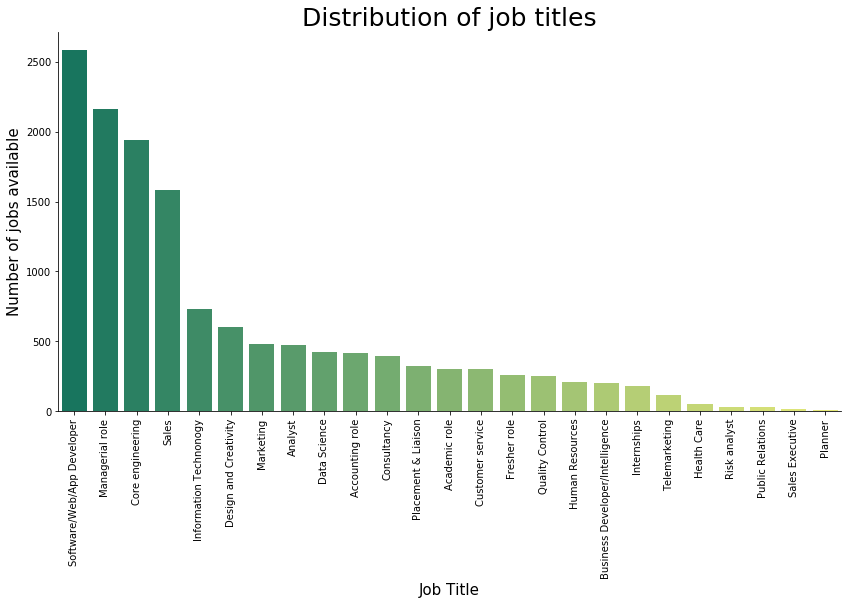

In [149]:
sns.catplot('Cleaned Title','Count',data=df_titles,kind='bar',aspect=2,height=6,palette='summer')
plt.xticks(rotation=90)
plt.xlabel('Job Title',size=15)
plt.ylabel('Number of jobs available',size=15)
plt.title('Distribution of job titles',size=25)

# Job Experience

In [150]:
grouped_df['Count']=grouped_df['Count'].astype(int)
grouped_df

,Experience category,Count
0,Early Professionals,982
1,Early/Mid Professionals,1033
2,Expereinced Professionals,2379
3,Mid Professionals,2018


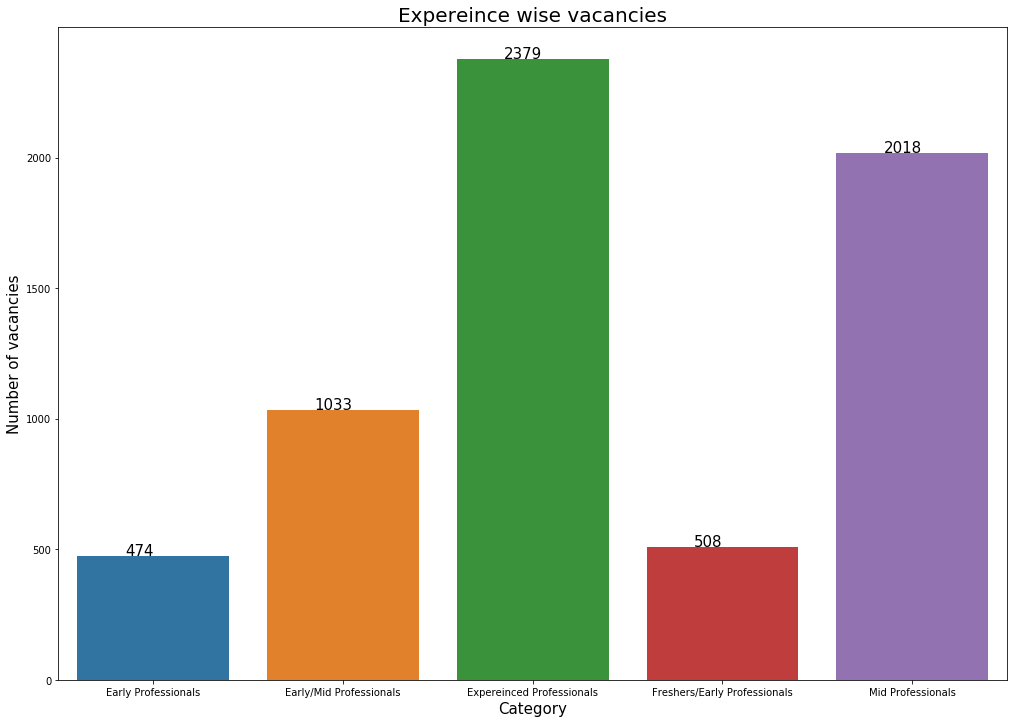

In [181]:
plt.figure(figsize=(17,12))
ax=sns.barplot('Experience category','Count',data=grouped_df)
plt.xlabel('Category',size=15)
plt.ylabel('Number of vacancies',size=15)
plt.title('Expereince wise vacancies',size=20)

for i in ax.patches:
    ax.text(i.get_x()+.25,i.get_height()+2.3,str(int((i.get_height()))),
            rotation=0,fontsize=15,color='black')

# Job Locations

In [152]:
# filter and find unique() cities from data set

df.Location = df.Location.str.upper()
new_location =df.Location.str.strip().str.split(",", expand = True)[0].str.split(" ", expand = True)[0].value_counts().reset_index()
new_location.columns = ["Location", "Job_Opportunities"]
new_location = new_location[:10]
new_location.style.background_gradient(cmap = "PuOr")

,Location,Job_Opportunities
0,BENGALURU/BANGALORE,4388
1,MUMBAI,1953
2,HYDERABAD,1701
3,CHENNAI,1172
4,BENGALURU,1129
5,DELHI,1053
6,NOIDA,924
7,GURGAON,781
8,DELHI/NCR(NATIONAL,539
9,GHAZIABAD,78


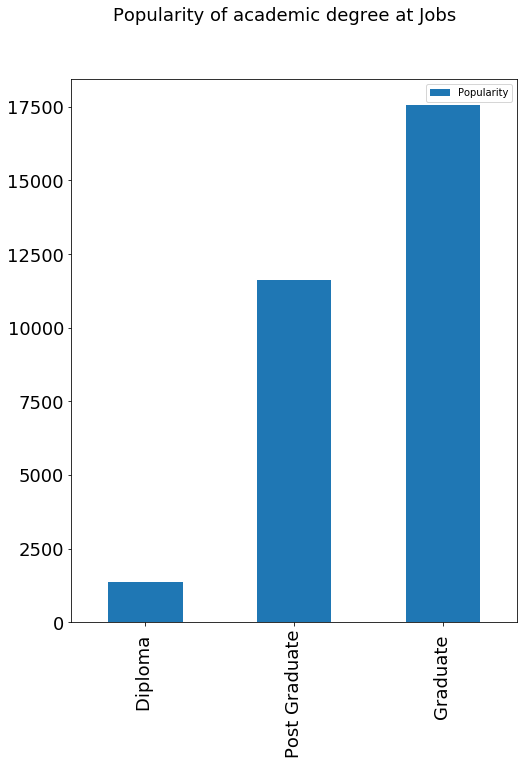

In [153]:
df_degree_popular = df_degree_popular[::-1] 
# plot
df_degree_popular.plot.bar(x='Qualification',y='Popularity',figsize=(8,10), stacked=True)
# add a suptitle
plt.suptitle("Popularity of academic degree at Jobs ", fontsize=18)
# set xlabel to ""
plt.xlabel("")

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# finally show the plot
plt.show()

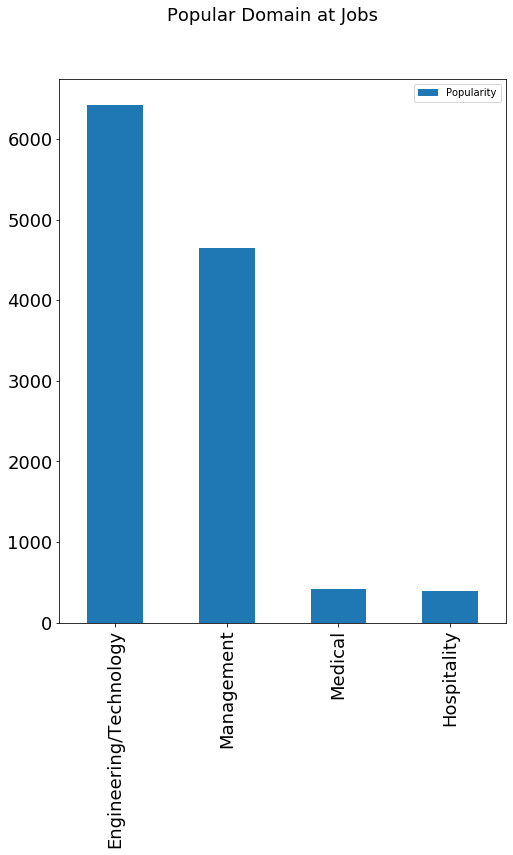

In [182]:
df_domain_popular = df_domain_popular[::-1] 
# plot
df_domain_popular.plot.bar(x='Domain',y='Popularity',figsize=(8,10), stacked=True)
# add a suptitle
plt.suptitle("Popular Domain at Jobs ", fontsize=18)
# set xlabel to ""
plt.xlabel("")

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# finally show the plot
plt.show()

# Word Cloud

In [155]:
import sys
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


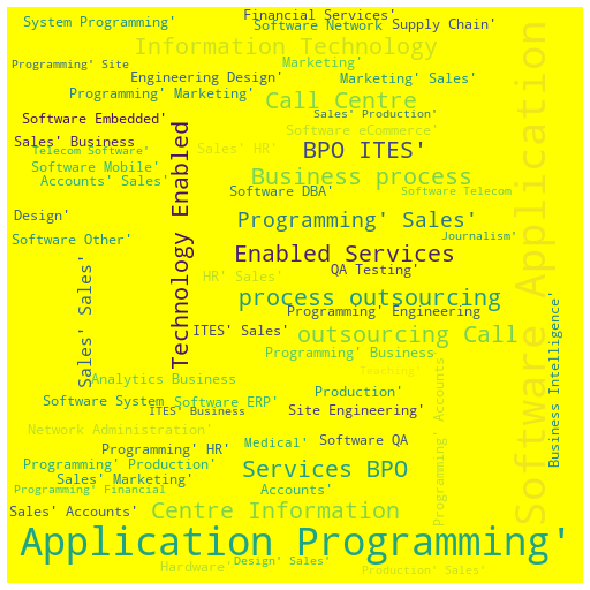

In [156]:
imp_words = df_temp['Key Skills'].to_list()

wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='Yellow', 
                min_font_size = 10).generate(str(imp_words))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

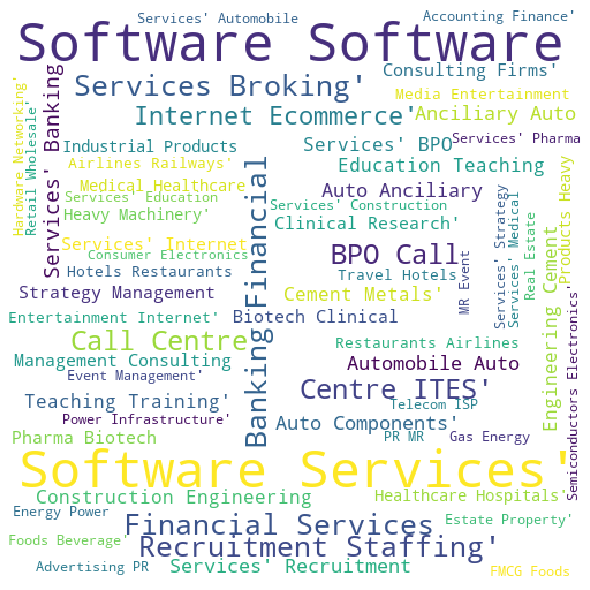

In [157]:
imp_words = df_temp['Industry'].to_list()

wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(str(imp_words))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

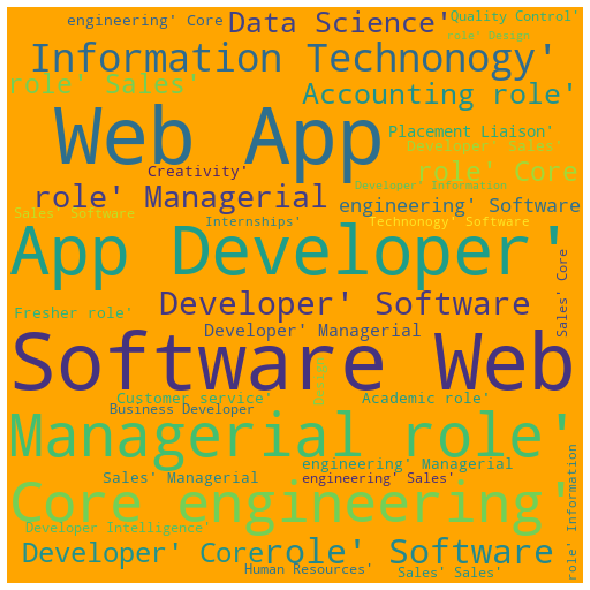

In [158]:
imp_words = df_temp['Cleaned Title'].to_list()

wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='orange', 
                min_font_size = 10).generate(str(imp_words))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

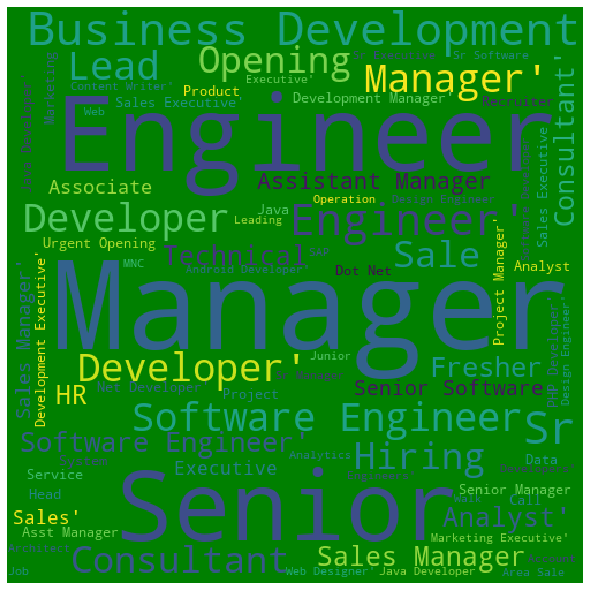

In [159]:
imp_words = df_temp['Job Title'].to_list()

wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='green', 
                min_font_size = 10).generate(str(imp_words))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [160]:
df.describe(include = ['object']).T

,count,unique,top,freq
company,14069,6406,Confidential,231
education,14069,1792,"UG: Any Graduate - Any Specialization, Graduat...",1390
Job Title,14069,10791,Business Development Executive,87
jobdescription,14069,13888,Job Description Send me Jobs like this Job D...,18
Cleaned Title,14069,25,Software/Web/App Developer,2584
Job Salary,14069,1312,Not Disclosed by Recruiter,10671
Job Experience Required,14069,127,2 - 7 yrs,1161
Key Skills,14069,44,IT Software - Application Programming,4356
Location,14069,1556,BENGALURU/BANGALORE,2823
Industry,14069,63,IT-Software / Software Services,6502


In [161]:
df.to_csv("after_vis_naukri_data.csv")